# InfoByte Task - , Iris Dataset EDA (Exploratory Data Analysis) and Model Building

In [34]:
# pandas for the access of data
import pandas as pd

# seaborn and matplotlib for the visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt

# for ignoring warnings while visualization
import warnings
warnings.filterwarnings("ignore")

# scikitlearn for test train split and model building as well as evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline

In [35]:
# reading the data
data = pd.read_csv("iris.csv")

## A quick glace of data

In [36]:
# for taking a look at first 5 entries
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# for the overview of entries and attributes
data.shape

(150, 6)

In [38]:
# getting information about columns like dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
# Getting the column names of data
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [40]:
# getting the statistical summary
data.drop(["Id"],axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
# getting the null value counts if any
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
# getting all possible target labels
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
# getting all possible target labels
dup = data.drop_duplicates("Species")
dup

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [44]:
# checking the data if its balanced or not
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## EDA (Visualization - part)

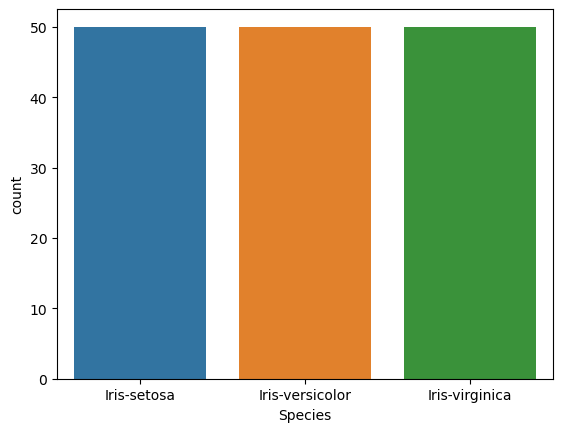

In [45]:
# Visualizing the balanced data
sns.countplot(x="Species",data=data)
plt.show()

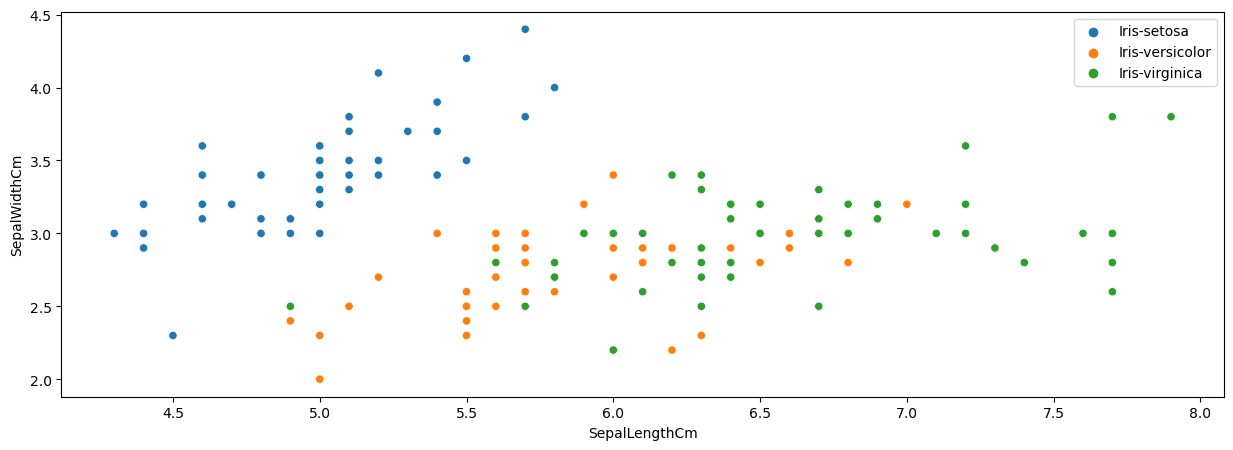

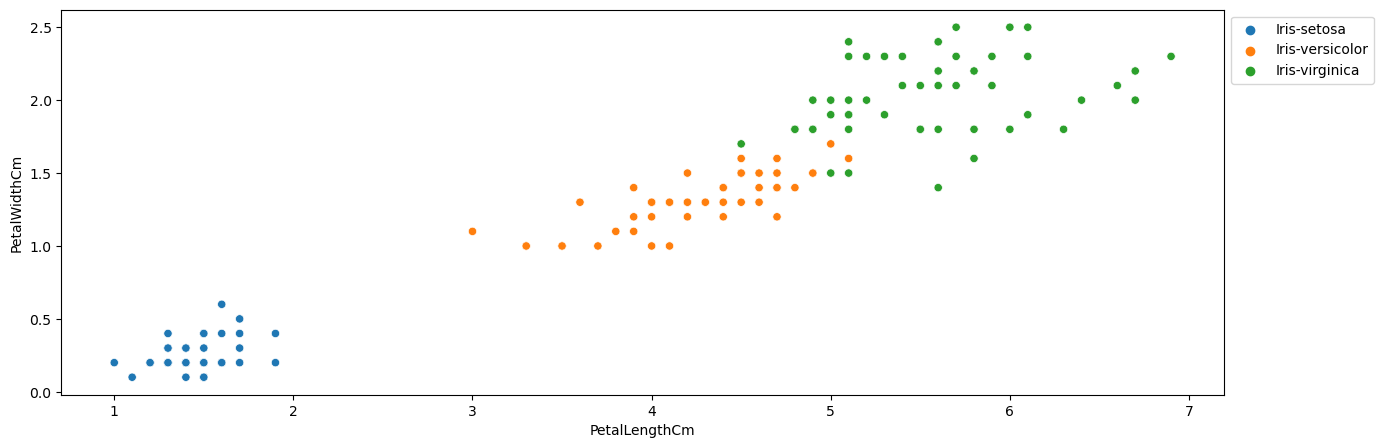

In [46]:
# visualizing the each target lable with respect to their (sepal and petal) (width and length)
plt.figure(figsize=(15,5))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=data)
plt.legend(bbox_to_anchor=(1,1),loc="best")
plt.show()
plt.figure(figsize=(15,5))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=data)
plt.legend(bbox_to_anchor=(1,1),loc="best")
plt.show()

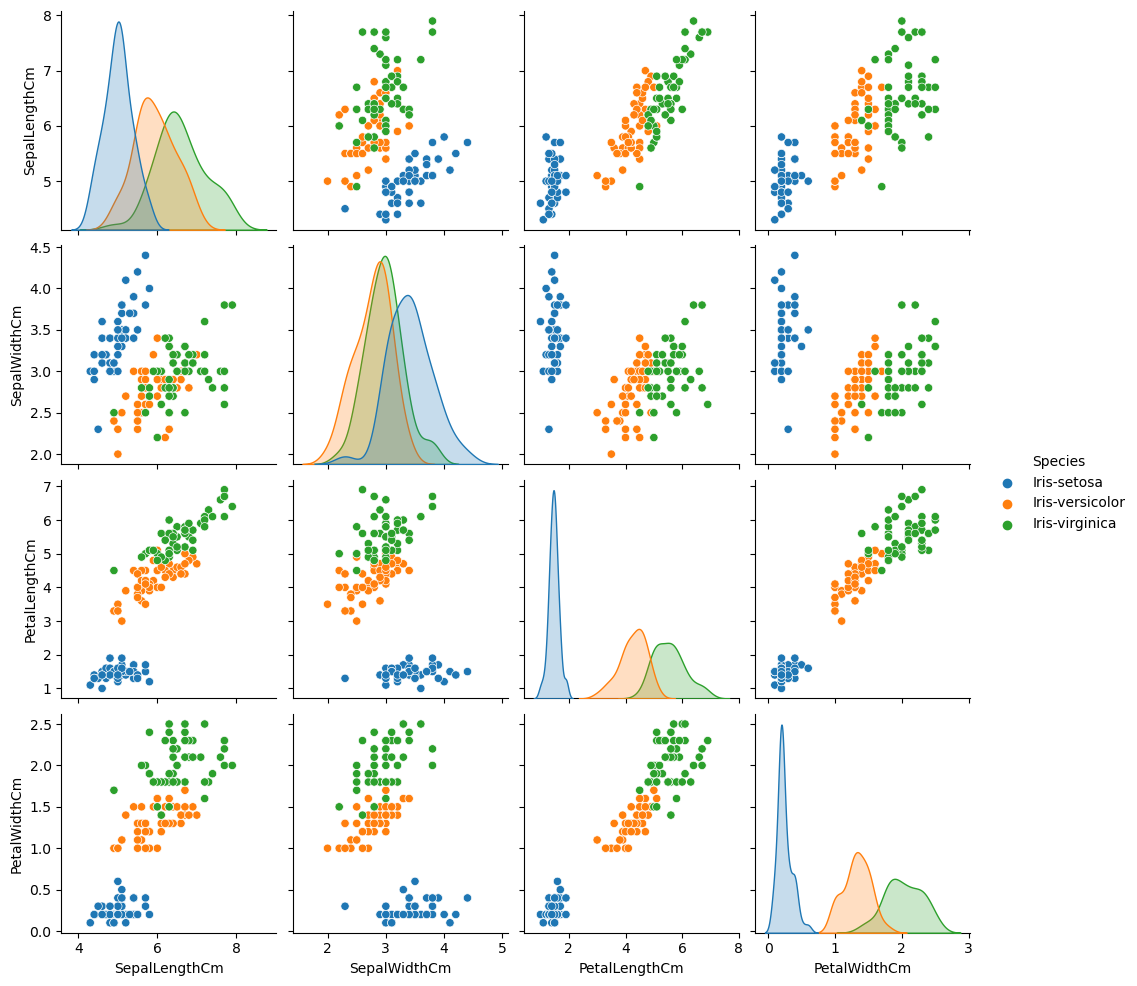

In [47]:
# visualizing the relationship between all attributes
sns.pairplot(data.drop(['Id'], axis = 1),
             hue='Species')
plt.show()

(array([48.,  2., 10., 26., 30., 17., 17.]),
 array([0.1       , 0.44285714, 0.78571429, 1.12857143, 1.47142857,
        1.81428571, 2.15714286, 2.5       ]),
 <BarContainer object of 7 artists>)

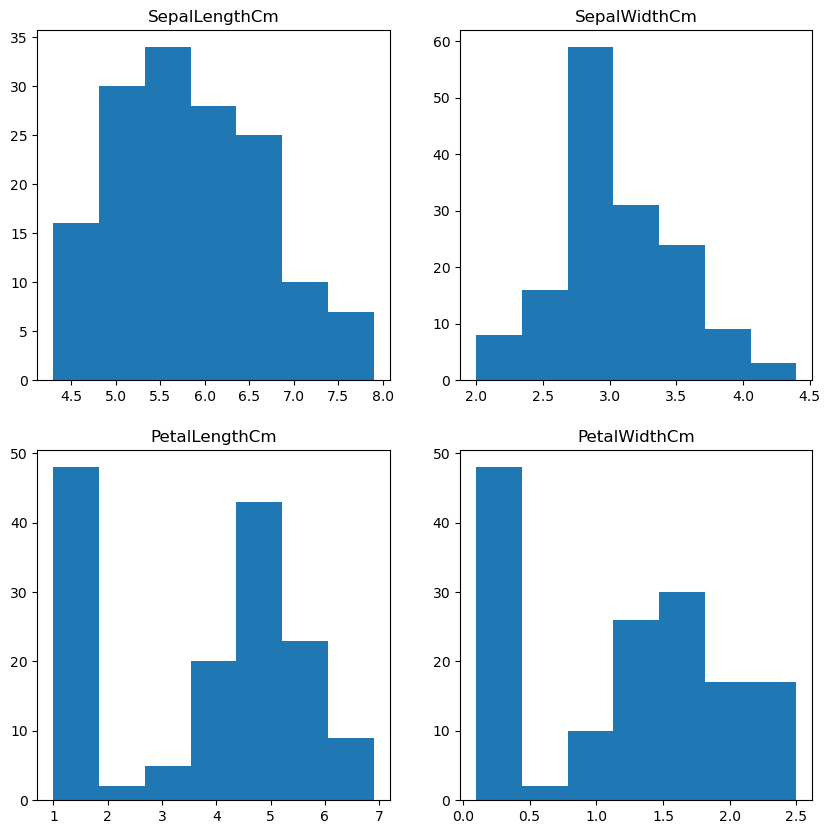

In [48]:
# visualizing the distribution of all attributes
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].set_title("SepalLengthCm")
ax[0,0].hist(data["SepalLengthCm"],bins=7)

ax[0,1].set_title("SepalWidthCm")
ax[0,1].hist(data["SepalWidthCm"],bins=7)

ax[1,0].set_title("PetalLengthCm")
ax[1,0].hist(data["PetalLengthCm"],bins=7)

ax[1,1].set_title("PetalWidthCm")
ax[1,1].hist(data["PetalWidthCm"],bins=7)


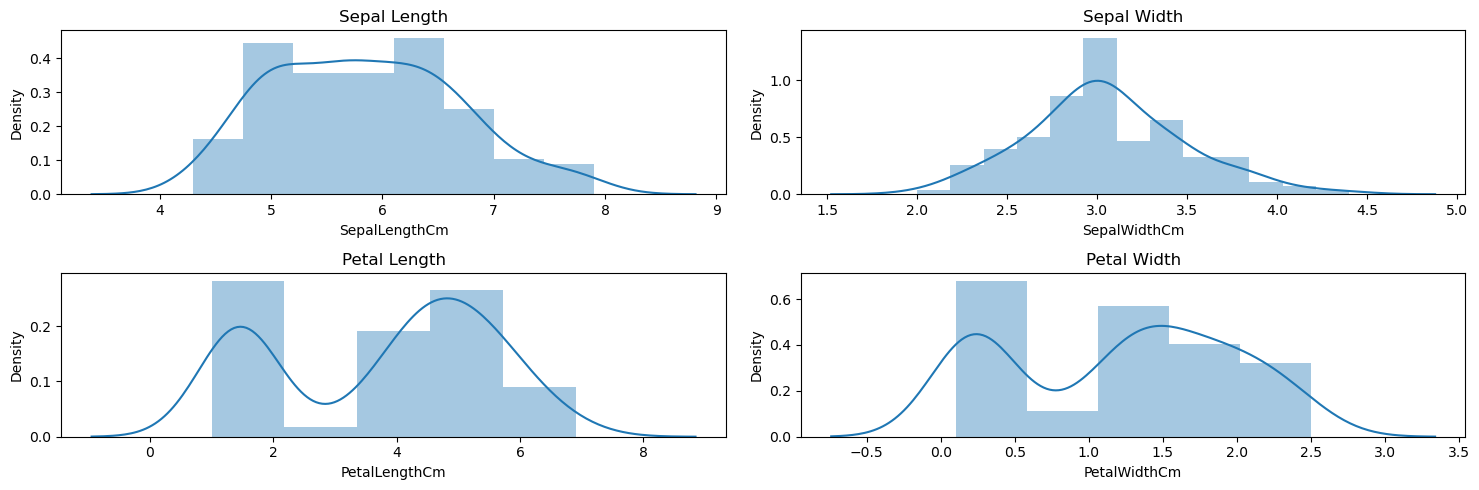

In [49]:
# visualizing the distribution of all attributes
fig, axes = plt.subplots(2, 2,figsize=(15,5))

sns.distplot(data["SepalLengthCm"], ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length")

sns.distplot(data["SepalWidthCm"], ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width")

sns.distplot(data["PetalLengthCm"], ax=axes[1, 0])
axes[1, 0].set_title("Petal Length")

sns.distplot(data["PetalWidthCm"], ax=axes[1, 1])
axes[1, 1].set_title("Petal Width")

plt.tight_layout()
plt.show()

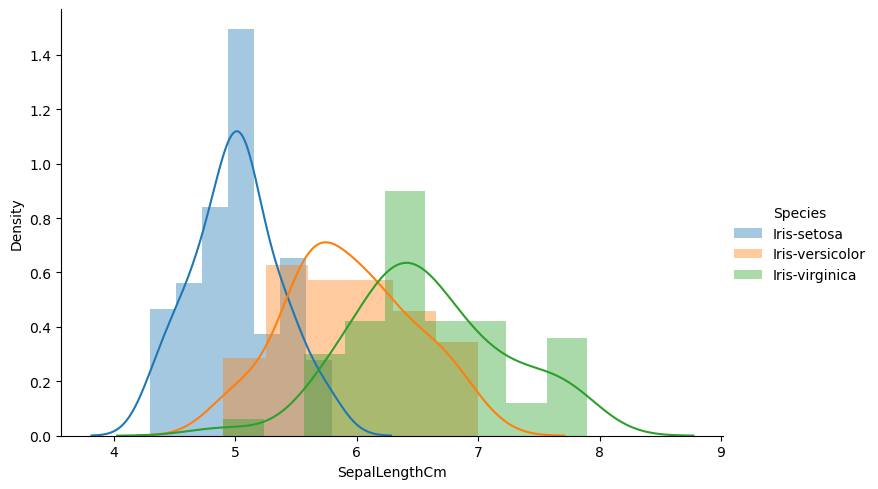

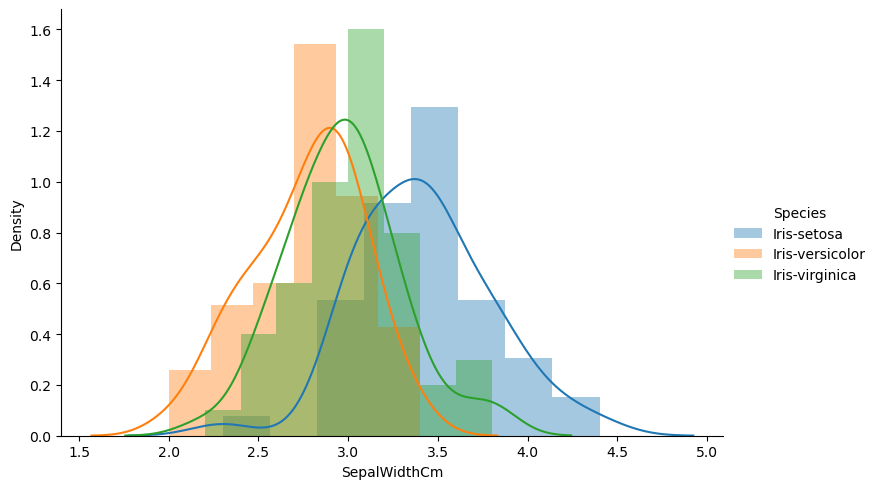

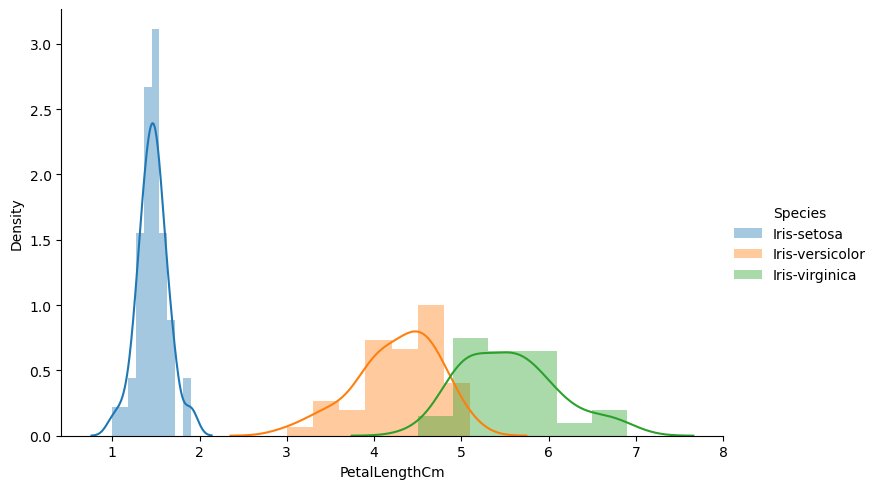

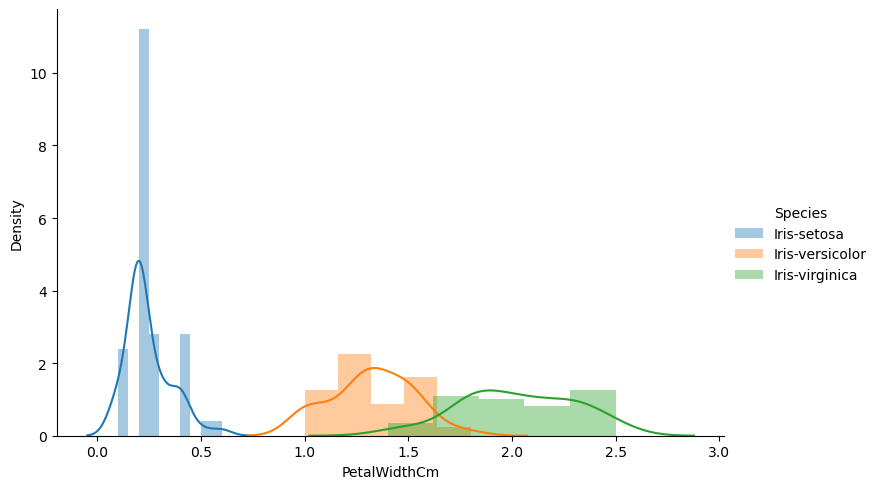

In [50]:
# visualizing the distribution of all attributes

plot = sns.FacetGrid(data,hue="Species",height=5, aspect=1.5)
plot.map(sns.distplot,"SepalLengthCm").add_legend()

plot = sns.FacetGrid(data,hue="Species",height=5, aspect=1.5)
plot.map(sns.distplot,"SepalWidthCm").add_legend()

plot = sns.FacetGrid(data,hue="Species",height=5, aspect=1.5)
plot.map(sns.distplot,"PetalLengthCm").add_legend()

plot = sns.FacetGrid(data,hue="Species",height=5, aspect=1.5)
plot.map(sns.distplot,"PetalWidthCm").add_legend()

plt.show()

In [51]:
#correlation: is a statistical measure that indicates the extent to which two variables are related.
data.drop(["Id"],axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

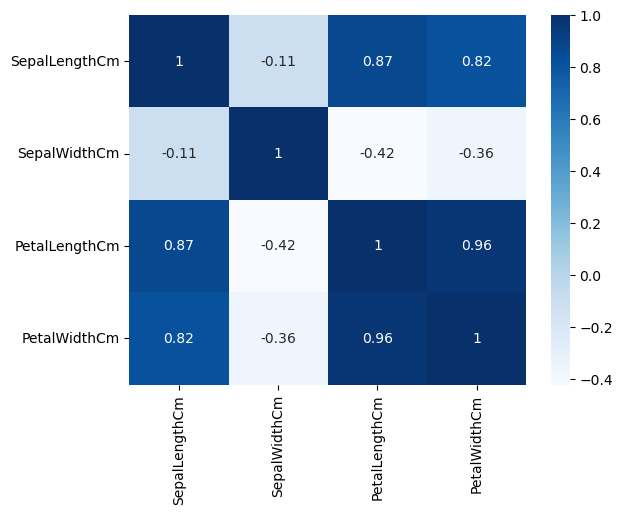

In [52]:
#heatmap: it shows a correlation between all numerical variables in the dataset.
sns.heatmap(data.corr().drop(["Id"],axis=1).drop(["Id"],axis=0),annot=True,cmap="Blues")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

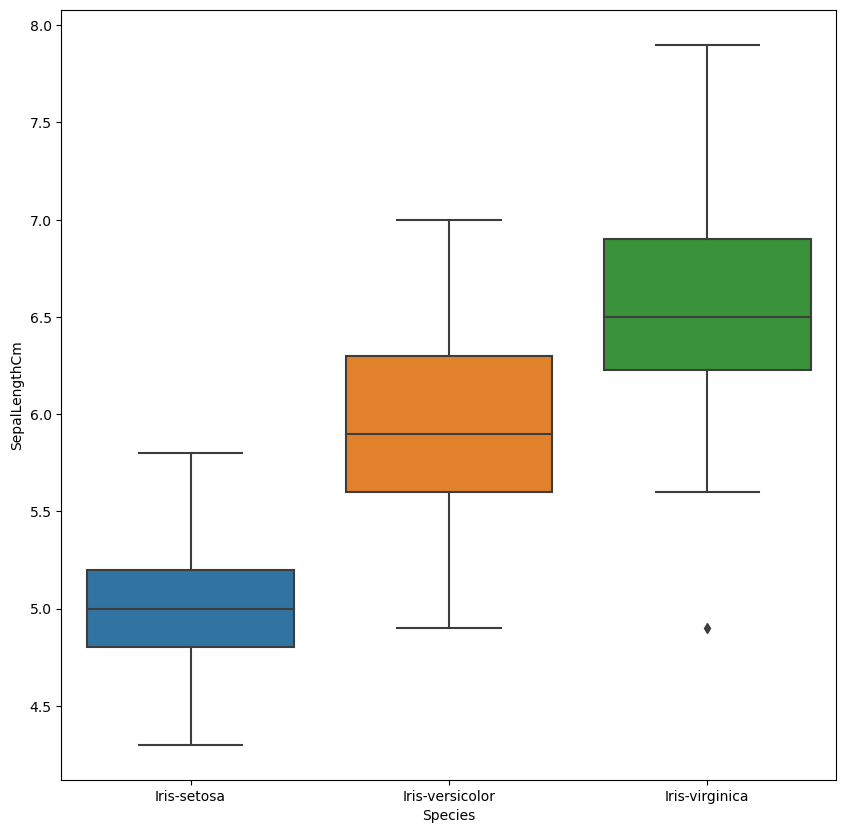

In [53]:
#Box plot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution i.e. the dots indicating the presence of outliers
plt.figure(figsize=(10,10))
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

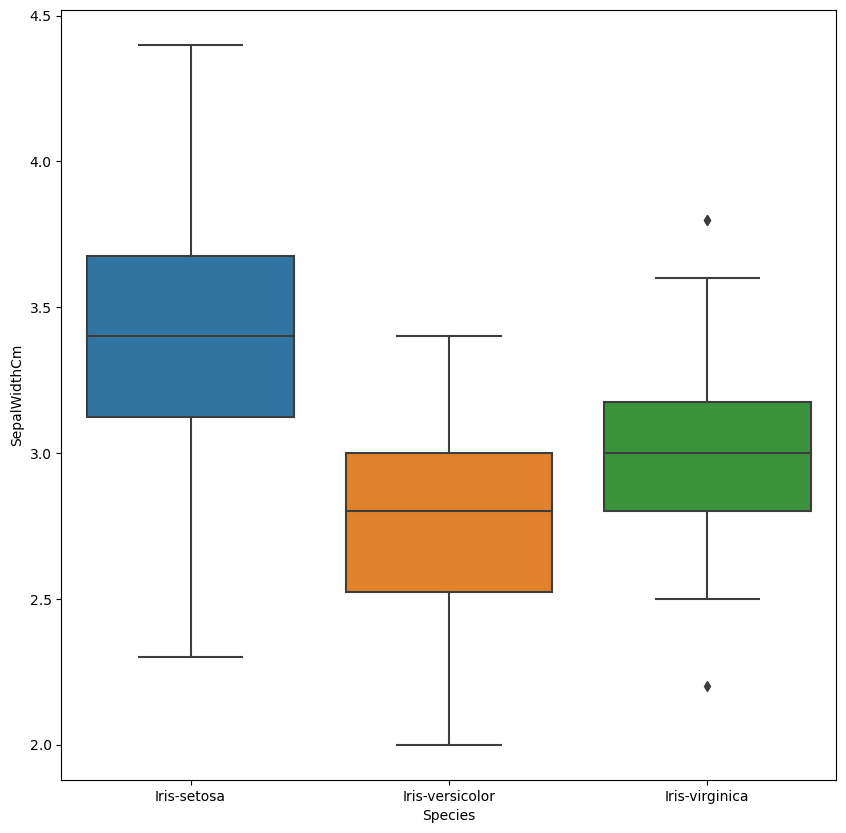

In [54]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Species",y="SepalWidthCm",data=data)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

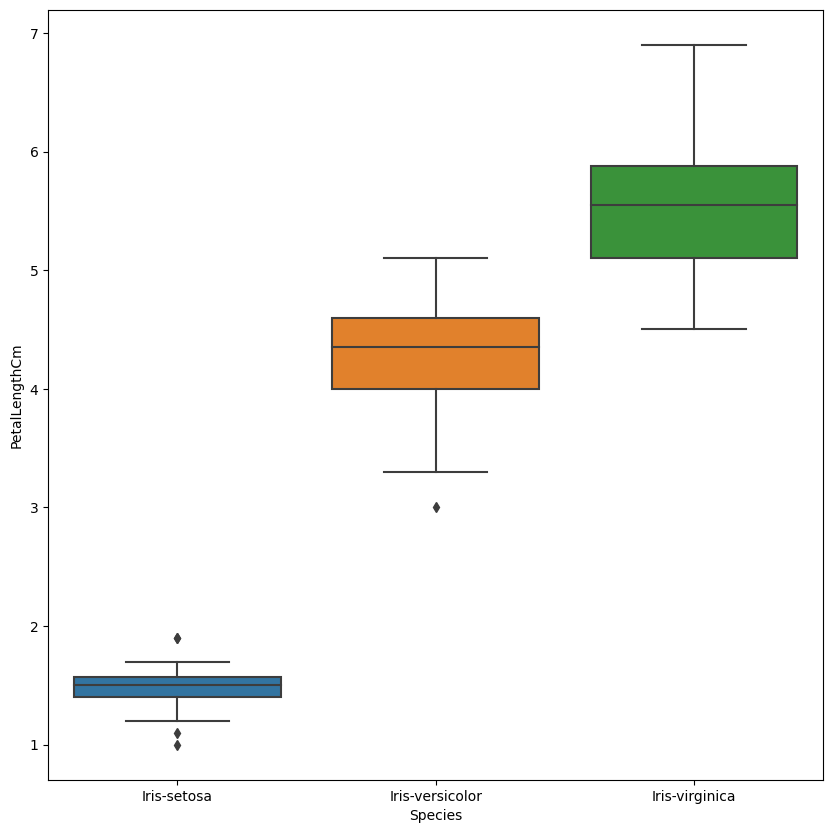

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

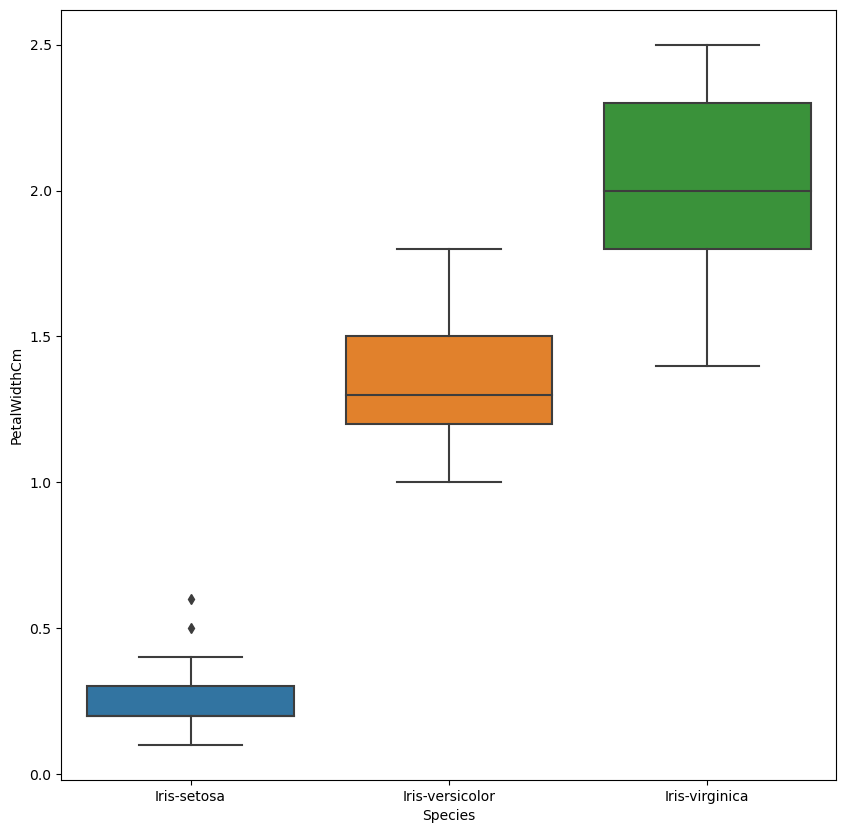

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Species",y="PetalWidthCm",data=data)

In [57]:

data.drop(["Id"],axis=1,inplace=True)
data = data.values
X = data[:,0:4]
Y = data[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [58]:
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [59]:
predictions = svn.predict(X_test)

In [60]:
accuracy_score(y_test, predictions)

0.9333333333333333

In [61]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



In [62]:
# # Save the model
# import pickle
# with open('SVM.pickle', 'wb') as f:
#     pickle.dump(svn, f)

# # Load the model
# with open('SVM.pickle', 'rb') as f:
#     model = pickle.load(f)
# model.predict(X_new)